# Handwritten digits recognition (using Convolutional Neural Network)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on GitHub
> - ▶️ Demo: [try this model in action](https://trekhleb.github.io/machine-learning-experiments)

In this experiment we will build a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **convolutional neural network** (CNN, or ConvNet) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

### Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.0.0
Keras version: 2.2.4-tf


#### Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [2]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [3]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

### Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [4]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [5]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [6]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


### Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [7]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

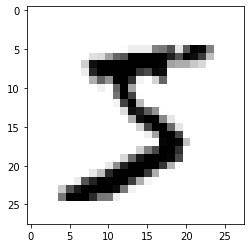

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

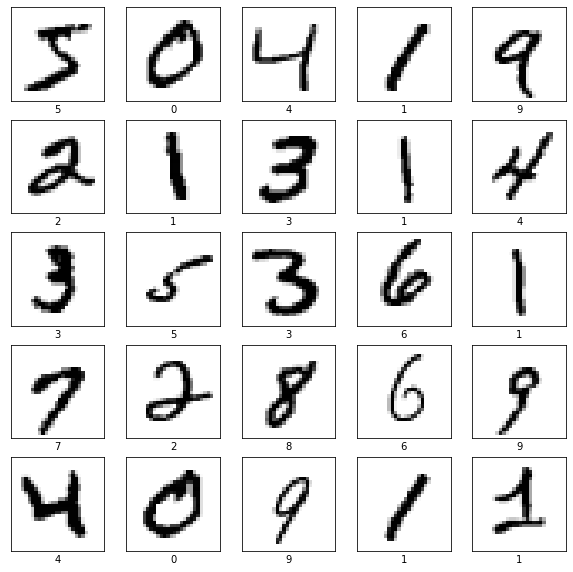

In [9]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### Reshaping the data

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of `(28, 28)` which means that it is a 28x28 matrix of color values form `0` to `255`. We need to reshape it to `(28, 28, 1)` shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [67]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [68]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


### Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [69]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [70]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

### Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

[Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable)
First layer of our convolutional neural network will be  have to specify the input shape. Then we specify some parameters for the convolution operation that takes place in this layer.

[MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable)
The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

Repeat another conv2d + maxPooling stack. Note that we have more filters in the convolution.

[Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer

[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...


In [75]:
model = tf.keras.models.Sequential()

# First layer of our convolutional neural network will be  have to specify the input shape.
# Then we specify some parameters for the convolution operation that takes place in this layer.
model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
#     activation=tf.keras.activations.relu,
#     kernel_initializer=tf.keras.initializers.VarianceScaling
))

# The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Repeat another conv2d + maxPooling stack. Note that we have more filters in the convolution.
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
#     activation=tf.keras.activations.relu,
#     kernel_initializer=tf.keras.initializers.VarianceScaling
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Now we flatten the output from the 2D filters into a 1D vector to prepare
# it for input into our last layer. This is common practice when feeding
# higher dimensional data to a final classification output layer.
model.add(tf.keras.layers.Flatten())

# Our last layer is a dense layer which has 10 output units, one for each
# output class (i.e. 0, 1, 2, 3, 4, 5, 6, 7, 8, 9).
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
#     kernel_initializer=tf.keras.initializers.VarianceScaling
))

Here is our model summary so far.

In [74]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 5,994
Trainable params: 5,994
Non-trainable params: 0
___________________________________________________

### Compile the model

In [104]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
#     loss=tf.keras.losses.categorical_crossentropy,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

### Train the model

While using as loss `categorical_crossentropy` it expects labels to be binary matrices (1s and 0s) of shape `(samples, classes)`. In our case the labels `y_train` are vector of integers (i.e. `[5, 8, 0, , ...]`). Let's convert labels to contain binary vectors as a values (i.e. `[[0, 0, 1, 0, 0, ...], [0, 0, 0, 0, 1, ...], ...]`).

In [86]:
y_train_binary = tf.keras.utils.to_categorical(y_train)
y_test_binary = tf.keras.utils.to_categorical(y_test)

In [83]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [84]:
y_train_binary

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [85]:
print('y_train.shape:', y_train.shape)
print('y_train_binary.shape:', y_train_binary.shape)

y_train.shape: (60000,)
y_train_binary.shape: (60000, 10)


In [105]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=5,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 34s 566us/sample - loss: 0.0378 - accuracy: 0.9874 - val_loss: 0.0416 - val_accuracy: 0.9865
Epoch 2/5
60000/60000 [==============================] - 27s 448us/sample - loss: 0.0342 - accuracy: 0.9887 - val_loss: 0.0479 - val_accuracy: 0.9852
Epoch 3/5
60000/60000 [==============================] - 28s 470us/sample - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0544 - val_accuracy: 0.9835
Epoch 4/5
60000/60000 [==============================] - 30s 498us/sample - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.0510 - val_accuracy: 0.9844
Epoch 5/5
60000/60000 [==============================] - 23s 381us/sample - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0455 - val_accuracy: 0.9864


Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

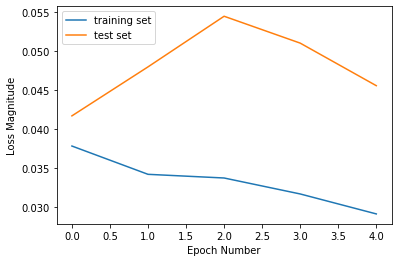

In [106]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

### Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

#### Training set accuracy

In [91]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_binary)

In [18]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.1765932301402092
Training accuracy:  0.9737667


#### Test set accuracy

In [93]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test_binary)

In [94]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.05279506163008046
Validation accuracy:  0.9822


### Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model shuold be saved to HDF5. To use this model on the front-end we will convert it to binary format using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [95]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [96]:
loaded_model = tf.keras.models.load_model(model_name)

### Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [97]:
predictions = loaded_model.predict([x_test_normalized])

In [98]:
print('predictions:', predictions.shape)

predictions: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [99]:
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,8.637416e-11,2.127450e-09,3.952055e-07,1.650621e-05,1.345044e-12,1.283302e-10,1.191584e-16,9.999831e-01,2.352049e-09,1.180509e-07
1,9.004288e-05,9.789688e-05,9.997446e-01,3.467467e-06,1.718875e-11,2.697255e-09,7.665171e-06,4.267402e-13,5.622469e-05,7.749211e-10
2,2.988964e-06,9.992660e-01,7.949136e-05,2.038607e-06,1.442537e-04,9.977807e-06,1.217407e-05,4.519732e-04,3.069301e-05,3.972951e-07
3,9.999946e-01,1.066404e-10,1.738635e-07,1.463411e-08,3.032990e-11,1.941709e-08,4.208339e-06,1.913816e-09,6.118702e-08,9.163837e-07
4,1.822136e-08,3.945494e-07,1.944889e-08,5.288185e-09,9.994851e-01,1.170552e-10,1.491142e-07,2.541886e-05,4.606347e-08,4.888490e-04
...,...,...,...,...,...,...,...,...,...,...
9995,2.410310e-09,1.589142e-06,9.999899e-01,7.446059e-06,3.373487e-16,8.234134e-13,1.218050e-13,6.847320e-09,1.038313e-06,8.228597e-12
9996,5.214379e-08,2.079836e-07,2.001542e-08,9.999920e-01,1.454543e-13,6.876052e-06,8.742089e-12,2.869513e-10,7.274617e-07,1.403321e-07
9997,3.491034e-15,6.676566e-10,1.211188e-12,1.588720e-11,9.999996e-01,3.096254e-12,9.980181e-12,6.393408e-09,1.713890e-07,1.319176e-07
9998,2.205576e-08,6.822441e-12,1.357727e-10,5.216028e-06,1.300136e-11,9.998171e-01,9.470104e-05,3.307170e-11,8.285471e-05,5.343538e-08


So our model is predicting that the first example from the test set is `7`.

In [26]:
print(np.argmax(predictions[0]))

7


Let's print the first image from a test set to see if model's prediction is correct.

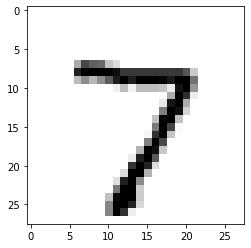

In [27]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

TypeError: Invalid shape (28, 28, 1) for image data

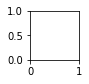

In [100]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = np.argmax(predictions[plot_index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

### Plotting confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number `5` with `3` or number `2` with `3`.

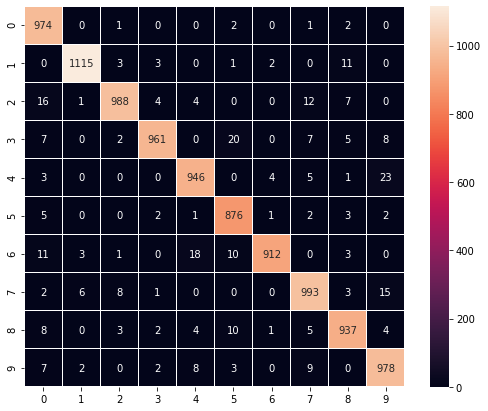

In [29]:
confusion_matrix = tf.math.confusion_matrix(
    y_test,
    np.argmax(predictions, axis=1)
)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### Debugging the model with TensorBoard

[TensorBoard](https://www.tensorflow.org/tensorboard) is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

In [103]:
%tensorboard --logdir .logs/fit